In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [2]:
hotels = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
hotels.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
types_of_hotels = hotels['hotel'].value_counts().to_frame()
types_of_hotels

,hotel
City Hotel,79330
Resort Hotel,40060


In [5]:
hotels['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [6]:
hotels['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

In [7]:
hotels['agent'] = hotels['agent'].fillna(0)

In [8]:
hotels

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [9]:
#Is the type of hotel associated with how often it is canceled?
is_canceled = hotels[['hotel', 'is_canceled']].groupby('hotel', as_index = False).agg(len)
is_canceled

,hotel,is_canceled
0,City Hotel,79330
1,Resort Hotel,40060


In [10]:
#A better metric would be the proportion of the type of hotel canceled. Since there may be more bookings on average for City Hotels which could 
#inflate the actual proportion of cancellations that are attributed to City Hotels.

In [11]:
#Conduct an AB test to assess whether there is some reason other than chance that explains why City Hotels are canceled more often than Resort Hotels
is_canceled = hotels[['hotel', 'is_canceled']].groupby('hotel', as_index = False).agg(np.mean)
observed_value = is_canceled['is_canceled'][0] - is_canceled['is_canceled'][1]
observed_value

0.13963608350237788

Null Hypothesis: City Hotels and Resort Hotels come from the same underlying distribution. There is no statistically significant difference in the proportion of bookings that are canceled amongst the two categories

Alternative Hypothesis: City Hotels and Resort Hotels come from different distributions. The proportion of City Hotels canceled is greater than the proportion of Resort Hotels in the population.

Text(0, 0.5, 'Percent per Proportion of City Hotels canceled minus Proportion of Resort Hotels canceled')

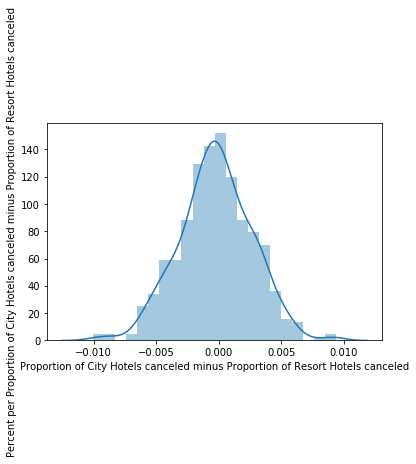

In [12]:
num_iterations = 500
simulated_test_statistic_values = np.empty(num_iterations)
for i in np.arange(num_iterations):
    shuffled_hotels = hotels.sample(len(hotels), replace = False).iloc[:, 0].to_frame().reset_index(drop=True)
    shuffled_hotels['canceled'] = hotels['is_canceled']
    is_canceled = shuffled_hotels[['hotel', 'canceled']].groupby('hotel').agg(np.mean)
    simulated_test_statistic_value = is_canceled['canceled'][0] - is_canceled['canceled'][1]
    simulated_test_statistic_values[i] = simulated_test_statistic_value
    
simulated_test_statistic_values = pd.Series(simulated_test_statistic_values)
sns.distplot(simulated_test_statistic_values, kde = True)
plt.xlabel("Proportion of City Hotels canceled minus Proportion of Resort Hotels canceled")
plt.ylabel("Percent per Proportion of City Hotels canceled minus Proportion of Resort Hotels canceled")


In [13]:
p_value = np.count_nonzero(simulated_test_statistic_values.to_numpy() >= observed_value)/len(simulated_test_statistic_values.to_numpy())
p_value

0.0

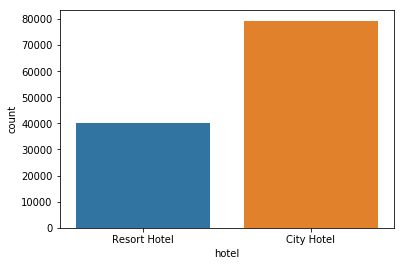

In [14]:
sns.countplot(hotels['hotel'])

With a small p-value of 0.0, which is less than the p-value cutoff of 0.05. We reject the null hypothesis. There is sufficient evidence to conclude that City Hotels and Resort Hotels come from different distributions. The proportion of City Hotels canceled is greater than the proportion of Resort Hotels canceled in the population.